Carregar dependências

In [1]:
#install.packages(c("tidyverse","ggplot2", "corrplot", "scales", "data.table", "dplyr", "ggpubr", "factoextra" ))

library(tidyverse)
library(ggplot2)
library(corrplot)
library(scales)
library(data.table)
library(dplyr)
library(ggpubr)
library(factoextra)


Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Warning message:
"package 'scales' was built under R version 3.6.3"
Attaching package: 'scales'

The following object is mas

Importar dados

In [2]:
# Adicionando o diretorio atual
setwd("./")

# Importando dados
base <- read.csv(
  file="./summer-products-with-rating-and-performance_2020-08.csv",
  header=TRUE,
  sep=","
)

base_filtrada <- base[c("title_orig", "price", "units_sold", "rating", "rating_count", "retail_price", "merchant_rating", "merchant_rating_count", "tags")]

colnames(base_filtrada)[0] <- "Nome"
colnames(base_filtrada)[1] <- "Produto"
colnames(base_filtrada)[2] <- "Preco_do_Produto"
colnames(base_filtrada)[3] <- "Unidades_Vendidas"
colnames(base_filtrada)[4] <- "Media_da_Nota_do_Produto"
colnames(base_filtrada)[5] <- "Quantidade_de_Avaliacoes"
colnames(base_filtrada)[6] <- "Preco_de_Varejo"
colnames(base_filtrada)[7] <- "Media_de_Nota_do_Vendedor"
colnames(base_filtrada)[8] <- "Quantidade_de_Avaliações_do_Vendedor"

Renomar colunas (tirar caracteres especiais)

Higienização: considerar apenas produtos com exatamente 1000 unidades vendidas. A ideia aqui é comparar produtos com escalas semelhantes. Usar um conjunto de dados muito grande prejudica a visualização dos clusters no dendograma.

In [3]:
subbase<-base_filtrada[(base_filtrada$Unidades_Vendidas==1000),]
subbase <- as.data.frame((subbase))
subbase<-slice_head(subbase, n = 30)
nrow(subbase)

[1] 30

Padronização das variáveis na mesma escala

In [4]:
base_e <- scale(subbase[, c("Preco_do_Produto", "Media_da_Nota_do_Produto", "Media_de_Nota_do_Vendedor")], center = FALSE, scale = TRUE)
base_e <- as.data.frame((base_e))
base_e

Preco_do_Produto,Media_da_Nota_do_Produto,Media_de_Nota_do_Vendedor
1.3717191,0.9764137,0.8943015
0.6618544,0.8985084,0.9612352
0.2183320,0.8959115,1.0018211
0.6618544,0.8621526,0.9589664
1.2574091,1.0179633,0.9878400
0.8001695,0.9530421,0.9868766
1.2574091,0.8777336,1.0280490
0.6527097,0.9738169,0.9733529
1.0287893,1.0776907,0.9984639
1.0287893,1.0465286,1.0274579


# Construção da matriz de correlação da base que será aplicada ao método

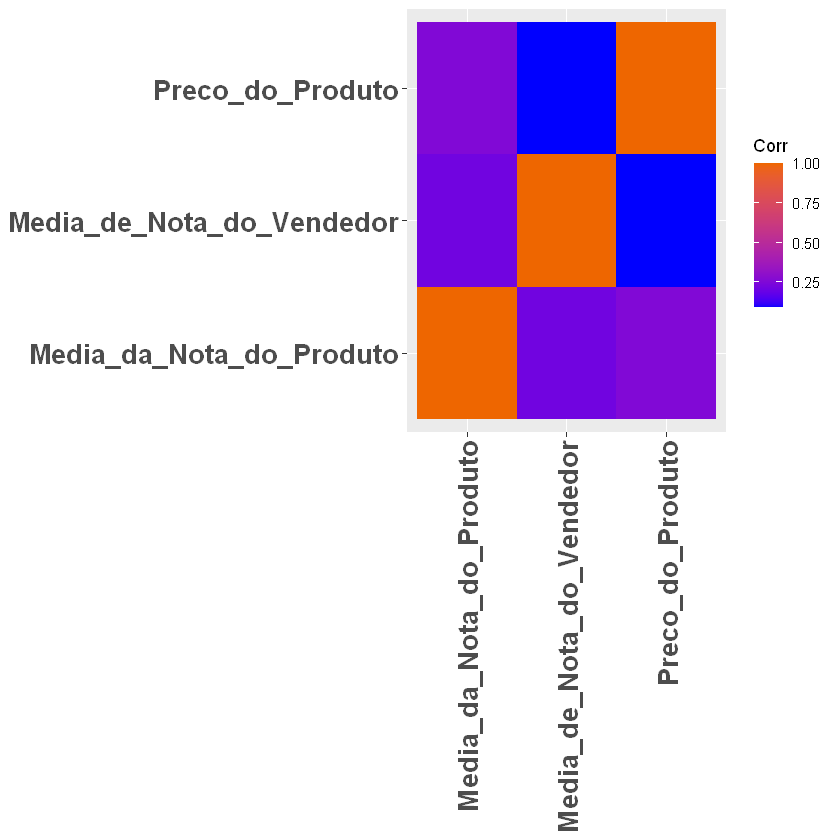

In [5]:
# Mapa de calor de correlacao
cor_map = data.frame(rows = rep(colnames(base_e), each = ncol(base_e)), cols = rep(colnames(base_e), each = 1, times=ncol(base_e)), Corr = c(cor(base_e)), stringsAsFactors=FALSE)

cor_heat = ggplot(cor_map, aes(rows, cols)) + geom_tile(aes(fill = Corr)) 
cor_heat = cor_heat + scale_fill_gradient(low = "#0000FF", high = "#EE6600") + theme(axis.title.y=element_blank(), axis.title.x=element_blank(), axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=16, face="bold"), axis.text.y = element_text(vjust = 0.5, hjust=1, size=16, face="bold"))
cor_heat

In [6]:
cor(base_e)

,Preco_do_Produto,Media_da_Nota_do_Produto,Media_de_Nota_do_Vendedor
Preco_do_Produto,1.00000000,0.2611090,0.09620484
Media_da_Nota_do_Produto,0.26110903,1.0000000,0.21717874
Media_de_Nota_do_Vendedor,0.09620484,0.2171787,1.00000000


In [20]:
fit<-princomp(base_e,cor=TRUE)
fit

summary(fit)

Call:
princomp(x = base_e, cor = TRUE)

Standard deviations:
   Comp.1    Comp.2    Comp.3 
1.1792199 0.9516836 0.8388913 

 3  variables and  30 observations.

Importance of components:
                          Comp.1    Comp.2    Comp.3
Standard deviation     1.1792199 0.9516836 0.8388913
Proportion of Variance 0.4635199 0.3019006 0.2345795
Cumulative Proportion  0.4635199 0.7654205 1.0000000

### Construção da Matriz de Distâncias

Considerando aqui apenas 30 produtos, dentre os 405 selecionados na higienização

In [7]:
dj <- dist(base_e)

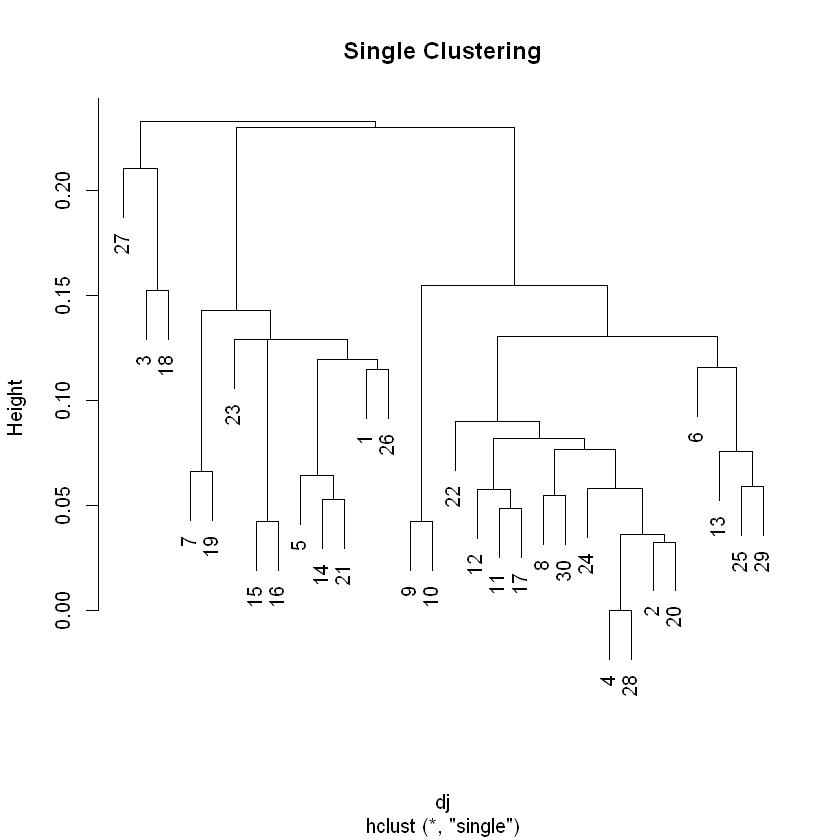

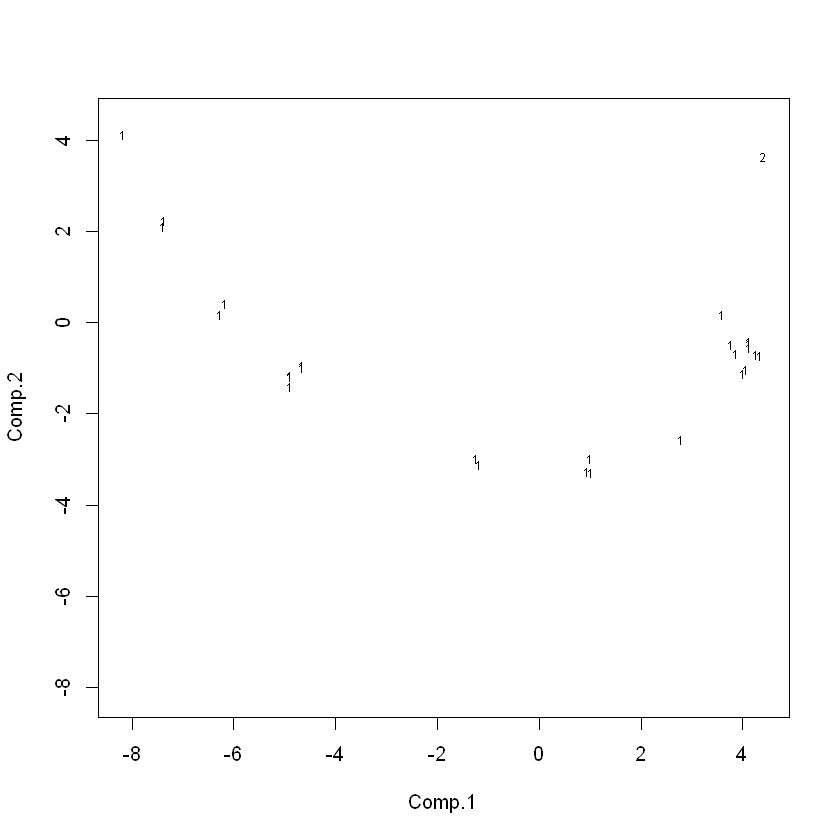

In [8]:
plot(cs <- hclust(dj, method='single'), main = "Single Clustering")

body_pc <- princomp(dj, cor = TRUE)
xlim <- range(body_pc$scores[,1])
plot(body_pc$scores[,1:2], type = "n", xlim = xlim, ylim = xlim)
lab <- cutree(cs, k=2)
text(body_pc$scores[,1:2], labels = lab, cex = 0.6)

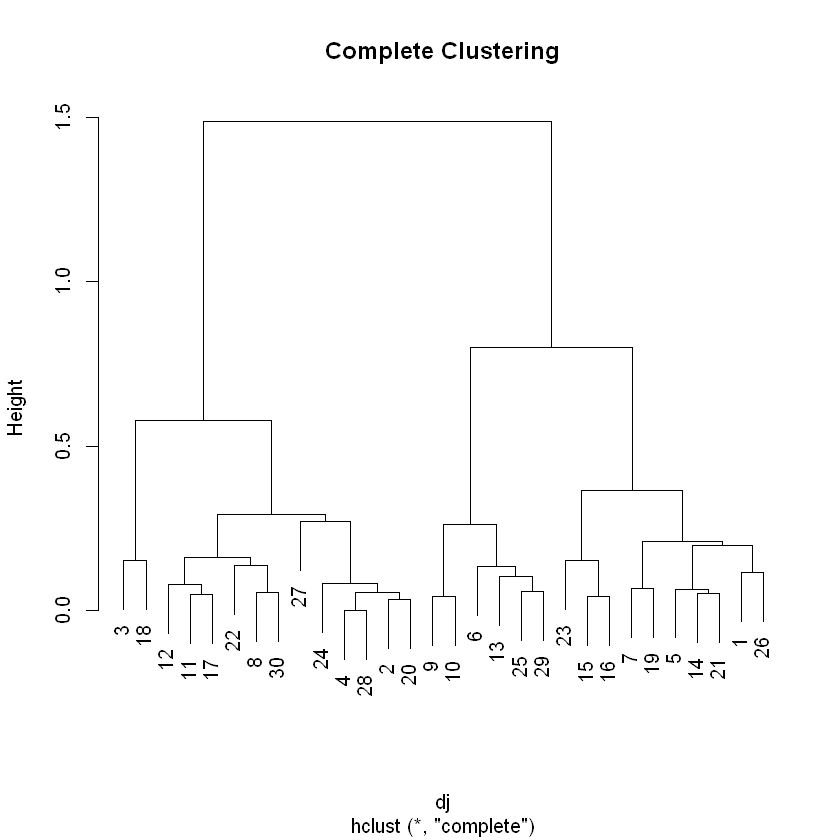

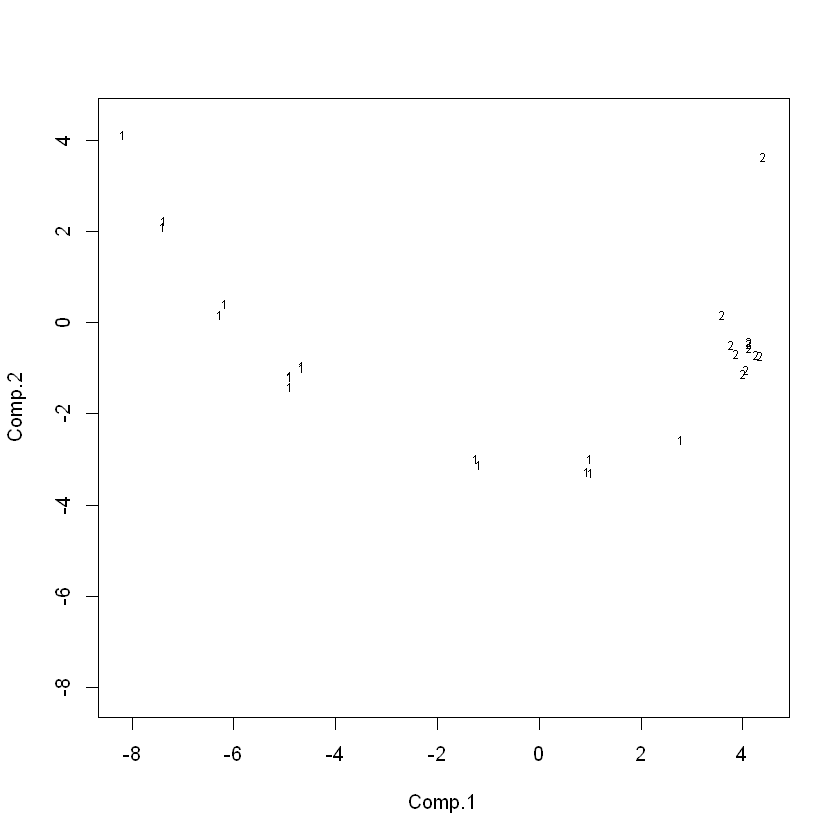

In [9]:
plot(cc <- hclust(dj, method='complete'), main = "Complete Clustering")

body_pc <- princomp(dj, cor = TRUE)
xlim <- range(body_pc$scores[,1])
plot(body_pc$scores[,1:2], type = "n", xlim = xlim, ylim = xlim)
lab <- cutree(cc, k=2)
text(body_pc$scores[,1:2], labels = lab, cex = 0.6)

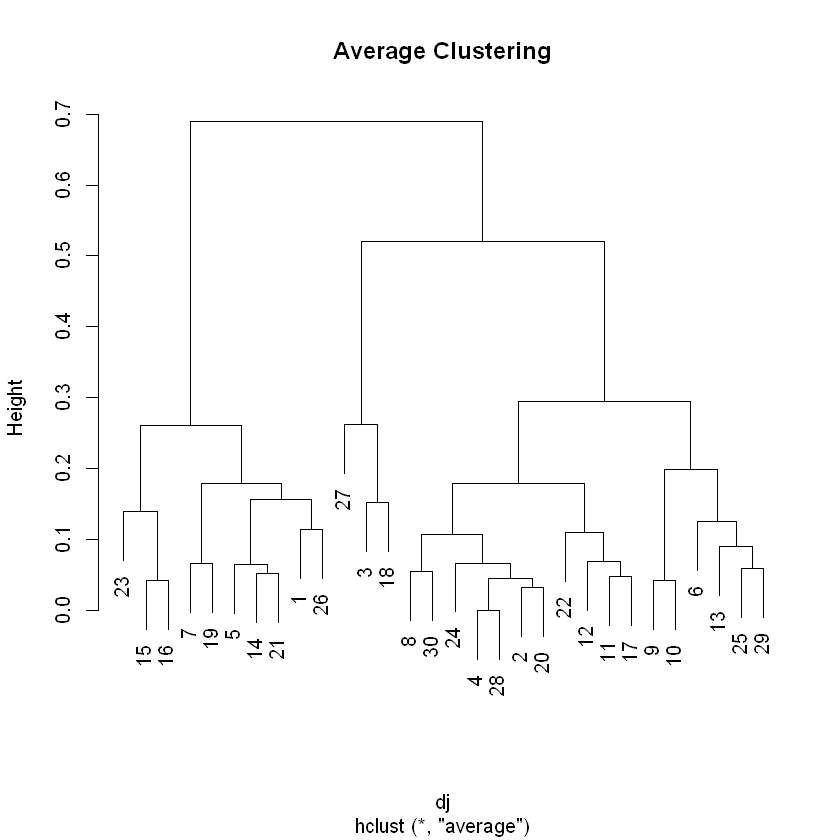

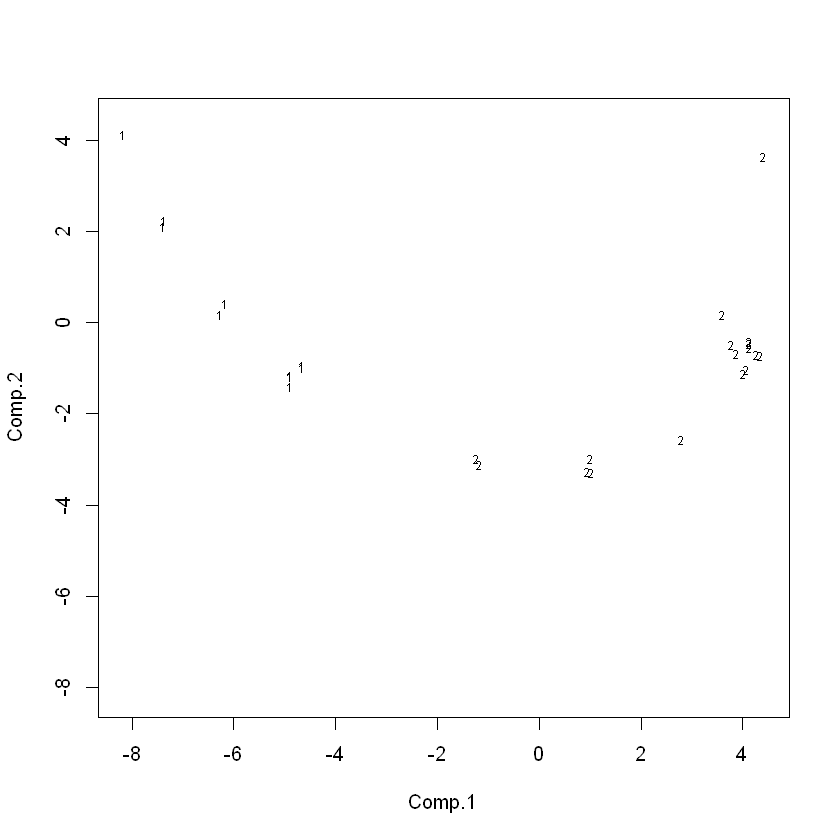

In [10]:
plot(ca <- hclust(dj, method='average'), main = "Average Clustering")

body_pc <- princomp(dj, cor = TRUE)
xlim <- range(body_pc$scores[,1])
plot(body_pc$scores[,1:2], type = "n", xlim = xlim, ylim = xlim)
lab <- cutree(ca, k=2)
text(body_pc$scores[,1:2], labels = lab, cex = 0.6)

# K-means

In [11]:
base_e.km=kmeans(base_e,2)
base_e.km

K-means clustering with 2 clusters of sizes 12, 18

Cluster means:
  Preco_do_Produto Media_da_Nota_do_Produto Media_de_Nota_do_Vendedor
1        1.3050383                1.0110383                 0.9891903
2        0.6444539                0.9595342                 0.9781797

Clustering vector:
 [1] 1 2 2 2 1 2 1 2 1 1 2 2 2 1 1 1 2 2 1 2 1 2 1 2 2 1 2 2 2 2

Within cluster sum of squares by cluster:
[1] 0.3991782 0.8834496
 (between_SS / total_SS =  71.1 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

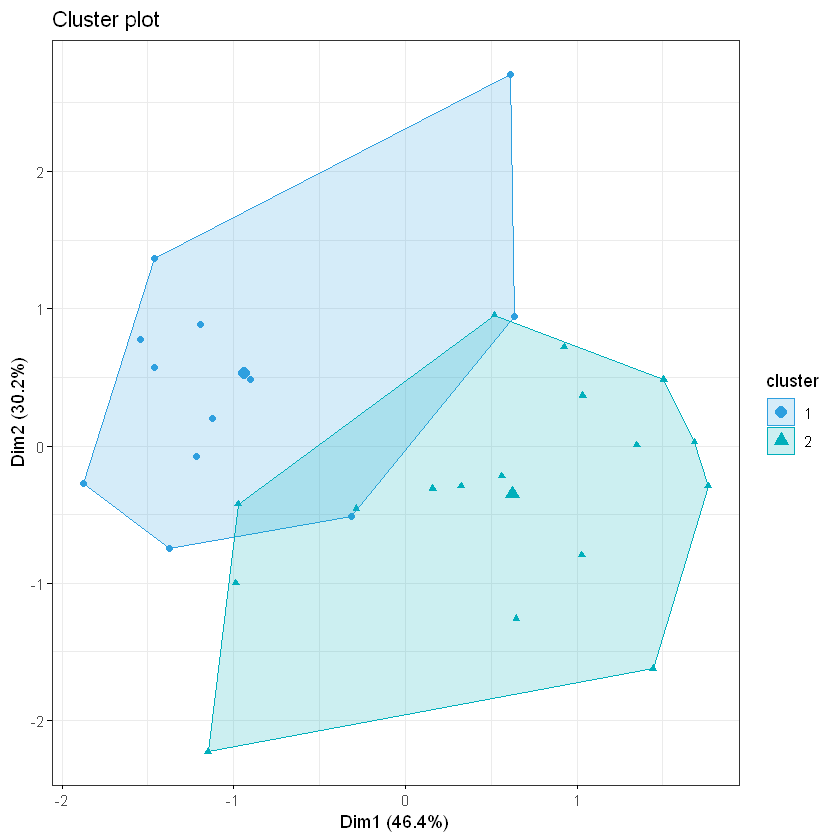

In [12]:
fviz_cluster(base_e.km, base_e,
             palette = c("#2E9FDF", "#00AFBB", "#E7B800"), 
             geom = "point",
             ellipse.type = "convex", 
             ggtheme = theme_bw()
             )

K-means clustering with 3 clusters of sizes 12, 15, 3

Cluster means:
  Preco_do_Produto Media_da_Nota_do_Produto Media_de_Nota_do_Vendedor
1        1.3050383                1.0110383                 0.9891903
2        0.7230484                0.9629101                 0.9791281
3        0.2514818                0.9426548                 0.9734378

Clustering vector:
 [1] 1 2 3 2 1 2 1 2 1 1 2 2 2 1 1 1 2 3 1 2 1 2 1 2 2 1 3 2 2 2

Within cluster sum of squares by cluster:
[1] 0.39917816 0.27116514 0.05524035
 (between_SS / total_SS =  83.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

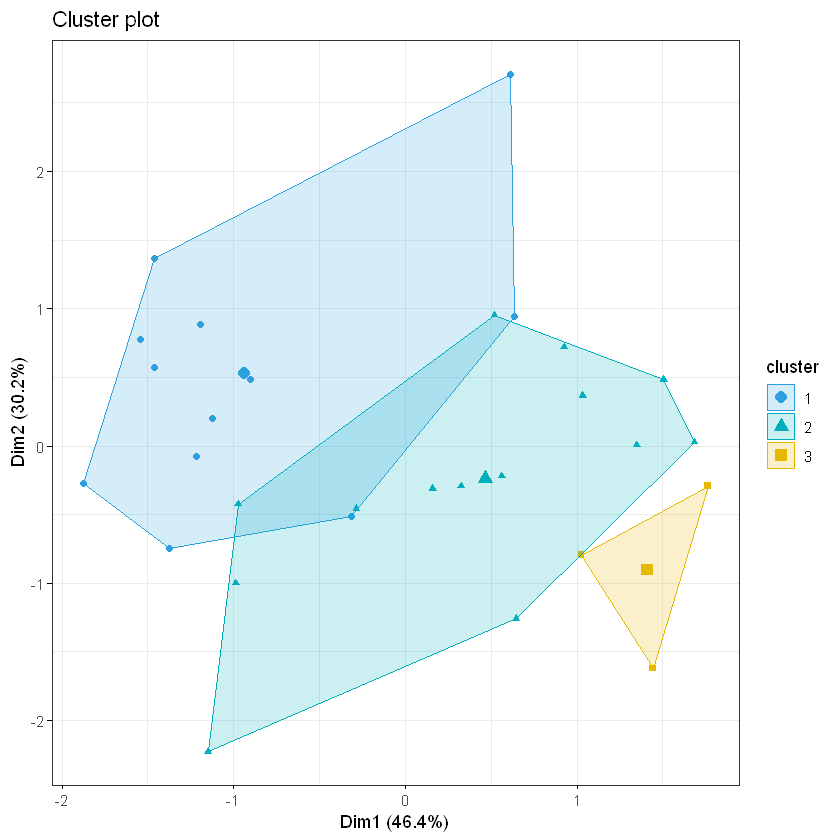

In [13]:
base_e.km2=kmeans(base_e,3)
base_e.km2

fviz_cluster(base_e.km2, base_e,
             palette = c("#2E9FDF", "#00AFBB", "#E7B800"), 
             geom = "point",
             ellipse.type = "convex", 
             ggtheme = theme_bw()
             )

In [14]:
subbase

Produto,Preco_do_Produto,Unidades_Vendidas,Media_da_Nota_do_Produto,Quantidade_de_Avaliacoes,Preco_de_Varejo,Media_de_Nota_do_Vendedor,Quantidade_de_Avaliações_do_Vendedor,tags
Women's Baggy Tunic Dress Summer Dress Denim Dress Denim Shirt Dress Shift Dress,12.00,1000,3.76,286,11,3.681287,342,"Jeans,Fashion,tunic,Shirt,Summer,Dress,Denim,summer dress,denimjeansdres,short sleeves,casual dresses,Women's Fashion,Tunic dress,minishirtdres,Lines,mididre"
Women's Fashion Summer Loose Sleeveless Pockets Solid Color Maxi Dress Casual Dress Plus Size,5.79,1000,3.46,613,5,3.956811,9470,"Summer,Plus Size,long dress,plus size dress,Dress,Women's Fashion,maxi dress,Casual,beach dress,Sleeveless dress,summer dresses,women dress,Fashion,loose dress,sleeveless"
New Women's Summer Causal Shorts Drawstring Short Pants Loose Short Pants,1.91,1000,3.45,141,6,4.123878,557,"Summer,Women,Shorts,pants,Loose,Short pants,drawstring,Causal"
Women Fashion Sleeveless Deep Neck Cross Spaghetti Strap Solid Color Tank Top Loose Blouse Beach Vest Top and Blouse Summer Casual T-shirts Plus Size,5.79,1000,3.32,121,42,3.947472,5083,"Summer,Vest,summer t-shirts,looseblouse,Cross,tank top,Spaghetti Strap,Sleeveless Shirt,Plus Size,topandblouse,deepneck,Spaghetti,Casual,Women Fashion,Women,blouse,Tank,Necks,Beach,Tops,beachvest,Women's Fashion,T Shirts,Fashion,sleeveless"
Summer Fashion Flare Sleeve Plus Size T-shirt Off The Shoulder Cute Solid Color Top Long Sleeve Shirt,11.00,1000,3.92,426,81,4.066326,39381,"Summer,Plus Size,Shirt,Sleeve,cute,Long Sleeve,flare,Tops,topsamptshirt,Women's Fashion,Clothes for women,cuteshirt,Fashion,long sleeve t shirt,solidcolorshirt,Summer Fashion,loose t-shirt,T Shirts"
S~5XL Zipper Vest Tee New V-neck Sleeveless Plus Size Slim Fit Tank Tops Summer Solid Color Casual Tops Blouses,7.00,1000,3.67,214,7,4.062361,3592,"blouse,Summer,Vest,Plus Size,Tank,zippers,Tops,Slim Fit,tank top,Women's Fashion,V-neck,topsampblouse,sleeveless,women top,slim,Casual"
Dew Design Women Summer Fashion Sexy V-Neck Vest Button Spaghetti Strap Tank Top Cotton Sleeveless Tank Top Solid Color Camisole Casual Loose Tops Holiday Beach Wear Plus Size S-5XL 5 Colors,11.00,1000,3.38,72,26,4.231842,4516,"Women Vest,Vest,Fashion,buttontop,camisole,Summer,Spaghetti Strap,tank top,Women's Fashion,Plus Size,Design,V-neck,sleeveless,sexy,Spaghetti,summer tops,Cotton,Tank,Tops,Casual,Cotton Vest,Women,sleevelesstshirt,Casual Tops,Holiday,Beach,button"
New Ladies Fashion Summer Tank Tops Sexy Backless Shirts Summer Vest Tops,5.71,1000,3.75,678,5,4.006692,80093,"Summer,Vest,Fashion,Tank,Shirt,backless top,summer shirt,topsamptshirt,tank top,Ladies,Sleeveless Shirt,backless,V-neck,solid color,sexy,summervest,Tops,Women Fashion,Ladies Fashion"
2018 Summer Fashion Women Casual Camouflage Tank Top Sleeveless O-neck Vest,9.00,1000,4.15,567,32,4.110059,9395,"Summer,Vest,Fashion,Tank,Slim T-shirt,camouflage,Tops,camouflagevest,tank top,Cool T-Shirts,Women's Fashion,sleeveless tops,Women,Casual T-Shirt,Casual Tops,Military,Casual,sleeveless,t"
New Women Lace Crochet Bikini Cover Up Swimwear Bathing Suit Summer Swimwear,9.00,1000,4.03,216,9,4.229409,4298,"Summer,midsleevebeachblouse,summerswimsuit,womensummerswimwear,crochet,Cover,womenbeachblouse,Swimsuit,Bikini,beachblouse,Swimwear,bikinibeachcoverup,Women,women fashion dress,women bathing suit,budsilkblouse,Suits,Women's Fashion,Lace"
